# Train & Analysis of Linear model

In [1]:
# Make sure you use the autograd version of numpy (which we named 'ag_np')
# to do all the loss calculations, since automatic gradients are needed
import autograd.numpy as ag_np

# Use helper packages
from AbstractBaseCollabFilterSGD import AbstractBaseCollabFilterSGD
from train_valid_test_loader import load_train_valid_test_datasets

# Some packages you might need (uncomment as necessary)
import pandas as pd
import matplotlib.pyplot as plt

from CollabFilterOneScalarPerItem import CollabFilterOneScalarPerItem

In [2]:
# Load the dataset
train_tuple, valid_tuple, test_tuple, n_users, n_items = \
    load_train_valid_test_datasets()
# Create the model and initialize its parameters
# to have right scale as the dataset (right num users and items)
model = CollabFilterOneScalarPerItem(
    n_epochs=10, batch_size=10000, step_size=0.1)
model.init_parameter_dict(n_users, n_items, train_tuple)

# Fit the model with SGD
model.fit(train_tuple, valid_tuple)

epoch       0.000 | loss_total     0.00136 | train_MAE     3.53059 | valid_MAE     3.54504 | grad_wrt_mu     0.00070 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000
epoch       0.143 | loss_total     0.00138 | train_MAE     3.53052 | valid_MAE     3.54497 | grad_wrt_mu     0.00071 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000
epoch       0.286 | loss_total     0.00138 | train_MAE     3.53044 | valid_MAE     3.54489 | grad_wrt_mu     0.00071 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000
epoch       0.429 | loss_total     0.00136 | train_MAE     3.53037 | valid_MAE     3.54482 | grad_wrt_mu     0.00070 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000
epoch       0.571 | loss_total     0.00137 | train_MAE     3.53030 | valid_MAE     3.54475 | grad_wrt_mu     0.00070 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000
epoch       0.714 | loss_total     0.00137 | train_MAE     3.53023 | valid_

In [3]:
final_mu = model.param_dict['mu'][0]
print(f"Final mu = {final_mu}")
print(f"Final Train MAE = {model.trace_mae_train[-1]}")
print(f"Final Valid MAE = {model.trace_mae_valid[-1]}")

Final mu = 0.004939398335313037
Final Train MAE = 3.525698645216429
Final Valid MAE = 3.540149146595135


In [4]:
test_y = test_tuple[2]
final_b_per_user = model.param_dict['b_per_user']
final_c_per_item = model.param_dict['c_per_item']
test_yhat = model.predict(test_tuple[0], test_tuple[1], mu=final_mu, b_per_user=final_b_per_user, c_per_item=final_c_per_item)
test_mae = ag_np.mean(ag_np.absolute(test_y - test_yhat))
print(f"Final Test MAE = {test_mae}")

Final Test MAE = 3.5012422696057803


In [5]:
epochs = ag_np.array(model.trace_epoch)
epochs_of_interest = ag_np.argwhere(epochs >= 2.0)

In [6]:
train_loss = ag_np.array(model.trace_mae_train)[epochs_of_interest]
valid_loss = ag_np.array( model.trace_mae_valid)[epochs_of_interest]

Text(0.5, 1.0, 'Scalar Baseline Model Loss over Epochs, Batch Size = 10000')

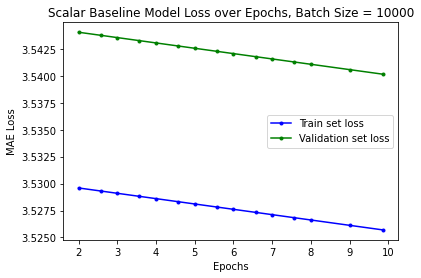

In [7]:
plt.plot( epochs[epochs_of_interest], train_loss, 'b.-', label='Train set loss')
plt.plot( epochs[epochs_of_interest], valid_loss, 'g.-', label='Validation set loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('MAE Loss')
plt.title('Scalar Baseline Model Loss over Epochs, Batch Size = 10000')

## Smaller batch this time

In [8]:
# Load the dataset
train_tuple, valid_tuple, test_tuple, n_users, n_items = \
    load_train_valid_test_datasets()
# Create the model and initialize its parameters
# to have right scale as the dataset (right num users and items)
model = CollabFilterOneScalarPerItem(
    n_epochs=10, batch_size=100, step_size=0.1)
model.init_parameter_dict(n_users, n_items, train_tuple)

# Fit the model with SGD
model.fit(train_tuple, valid_tuple)

epoch       0.000 | loss_total     0.13410 | train_MAE     3.53059 | valid_MAE     3.54504 | grad_wrt_mu     0.07020 | grad_wrt_b_per_user     0.00007 | grad_wrt_c_per_item     0.00004
epoch       0.001 | loss_total     0.14179 | train_MAE     3.52354 | valid_MAE     3.53799 | grad_wrt_mu     0.07206 | grad_wrt_b_per_user     0.00008 | grad_wrt_c_per_item     0.00004
epoch       0.003 | loss_total     0.13928 | train_MAE     3.51631 | valid_MAE     3.53076 | grad_wrt_mu     0.07111 | grad_wrt_b_per_user     0.00008 | grad_wrt_c_per_item     0.00004
epoch       0.004 | loss_total     0.13290 | train_MAE     3.50917 | valid_MAE     3.52363 | grad_wrt_mu     0.06997 | grad_wrt_b_per_user     0.00007 | grad_wrt_c_per_item     0.00004
epoch       0.126 | loss_total     0.11085 | train_MAE     2.96078 | valid_MAE     2.97526 | grad_wrt_mu     0.06300 | grad_wrt_b_per_user     0.00007 | grad_wrt_c_per_item     0.00004
epoch       0.250 | loss_total     0.06929 | train_MAE     2.48922 | valid_

In [9]:
final_mu = model.param_dict['mu'][0]
print(f"Final mu = {final_mu}")
print(f"Final Train MAE = {model.trace_mae_train[-1]}")
print(f"Final Valid MAE = {model.trace_mae_valid[-1]}")

Final mu = 3.517453523061415
Final Train MAE = 0.9352817175607294
Final Valid MAE = 0.9362091831409901


In [10]:
test_y = test_tuple[2]
final_b_per_user = model.param_dict['b_per_user']
final_c_per_item = model.param_dict['c_per_item']
test_yhat = model.predict(test_tuple[0], test_tuple[1], mu=final_mu, b_per_user=final_b_per_user, c_per_item=final_c_per_item)
test_mae = ag_np.mean(ag_np.absolute(test_y - test_yhat))
print(f"Final Test MAE = {test_mae}")

Final Test MAE = 0.9370563672409178


In [11]:
epochs = ag_np.array(model.trace_epoch)
epochs_of_interest = ag_np.argwhere(epochs >= 2.0)

In [12]:
train_loss = ag_np.array(model.trace_mae_train)[epochs_of_interest]
valid_loss = ag_np.array( model.trace_mae_valid)[epochs_of_interest]

Text(0.5, 1.0, 'Scalar Baseline Model Loss over Epochs, Batch Size = 100')

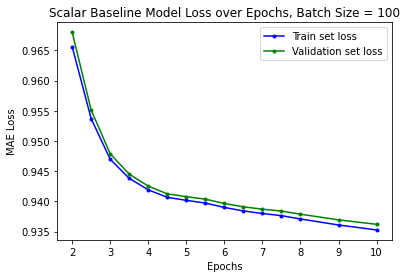

In [13]:
plt.plot( epochs[epochs_of_interest], train_loss, 'b.-', label='Train set loss')
plt.plot( epochs[epochs_of_interest], valid_loss, 'g.-', label='Validation set loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('MAE Loss')
plt.title('Scalar Baseline Model Loss over Epochs, Batch Size = 100')

## short answer - item weight params

In [19]:
import os 
data_path='data_movie_lens_100k/'
select_movies_df = pd.read_csv(os.path.join(data_path, "select_movies.csv"))
select_movies_df

,item_id,title,release_year,orig_item_id
0,0,Toy Story (1995),1995,1
1,70,"Lion King, The (1994)",1994,71
2,98,Snow White and the Seven Dwarfs (1937),1937,99
3,131,"Wizard of Oz, The (1939)",1939,132
4,142,"Sound of Music, The (1965)",1965,143
5,49,Star Wars (1977),1977,50
6,171,"Empire Strikes Back, The (1980)",1980,172
7,180,Return of the Jedi (1983),1997,181
8,81,Jurassic Park (1993),1993,82
9,251,"Lost World: Jurassic Park, The (1997)",1997,252


In [24]:
movie_ids = select_movies_df['item_id'].values

In [25]:
final_c_per_item[movie_ids]

array([ 0.03736623,  0.01482427,  0.01049803,  0.02532661,  0.0127159 ,
        0.08681404,  0.04201366,  0.05001757,  0.01493216, -0.00669885,
        0.05354375,  0.02795984,  0.00659206,  0.00605273,  0.00267073,
        0.00556919,  0.01383031, -0.00116423,  0.00902559, -0.00327181])

In [29]:
movie_titles = select_movies_df['title'].values
movie_titles

array(['Toy Story (1995)', 'Lion King, The (1994)',
       'Snow White and the Seven Dwarfs (1937)',
       'Wizard of Oz, The (1939)', 'Sound of Music, The (1965)',
       'Star Wars (1977)', 'Empire Strikes Back, The (1980)',
       'Return of the Jedi (1983)', 'Jurassic Park (1993)',
       'Lost World: Jurassic Park, The (1997)',
       'Raiders of the Lost Ark (1981)',
       'Indiana Jones and the Last Crusade (1989)',
       'While You Were Sleeping (1995)', 'Sleepless in Seattle (1993)',
       "My Best Friend's Wedding (1997)",
       'Nightmare Before Christmas, The (1993)', 'Shining, The (1980)',
       'Nightmare on Elm Street, A (1984)', 'Scream (1996)',
       'Scream 2 (1997)'], dtype=object)